 * définition du sujet - lecture Hansel
 * mise en place du python notebook
 * demos de brian

installation des outils
-----------------------

1. virtual box
2. VM ubuntu
3. <<< guest additions + clone 
4. neurodebian

```
    wget -O- http://neuro.debian.net/lists/trusty.de-md.full | sudo tee /etc/apt/sources.list.d/neurodebian.sources.list
    sudo apt-key adv --recv-keys --keyserver pgp.mit.edu 2649A5A9
    sudo apt-get update
```

5. install on ubuntu

```
sudo apt-get install aptitude
sudo aptitude install ipython-notebook
sudo aptitude install python-matplotlib
sudo aptitude install python-brian 
sudo aptitude install texlive-full


sudo aptitude install python-pynn 
pip install --user neurotools 

```

<!-- TEASER_END -->

## Prise en main des notebooks

### installation

Quelques liens:

http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb

à essayer:

http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Trapezoid%20Rule.ipynb
http://nbviewer.ipython.org/github/jonasnick/ReceptiveFields/blob/master/receptiveFields.ipynb


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [19]:
a = 10

In [20]:
print (a)

10


In [21]:
from IPython.display import FileLink

FileLink('Week 5.ipynb',url_prefix='')

/Users/lolo/Dropbox/ChloePasturel/Week 5.ipynb

<h1> titre 1 </h1>
<h2> titre 2 </h2>
<h3> titre 3 </h3>
<blockquote> lalala </blockquote>
<ul> <li> liste </li> </ul>
<p>*italique* _italique_</p>
<p>**gras**</p>

une liste :
* un
    * deux
        * trois
            * quatre
* deux


1. un
    1. un
        1. un
            1. un
    2. deux
2. deux

In [22]:
a = 10
b = 10
print (a + b)

20


In [23]:
%%capture n
x = 10
print (x)

In [24]:
n()

10


In [25]:
import matplotlib


In [26]:
matplotlib.rcParams['text.usetex'] = True


\begin{align} \dot{x} & = \sigma(y-x) \\ \dot{y} & = \rho x - y - xz \\ \dot{z} & = -\beta z + xy \end{align}
\begin{equation*} \left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right) \end{equation*}

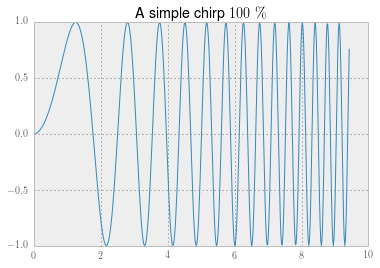

In [27]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title(r'A simple chirp $100~\%$');

In [28]:
plt.subplots?

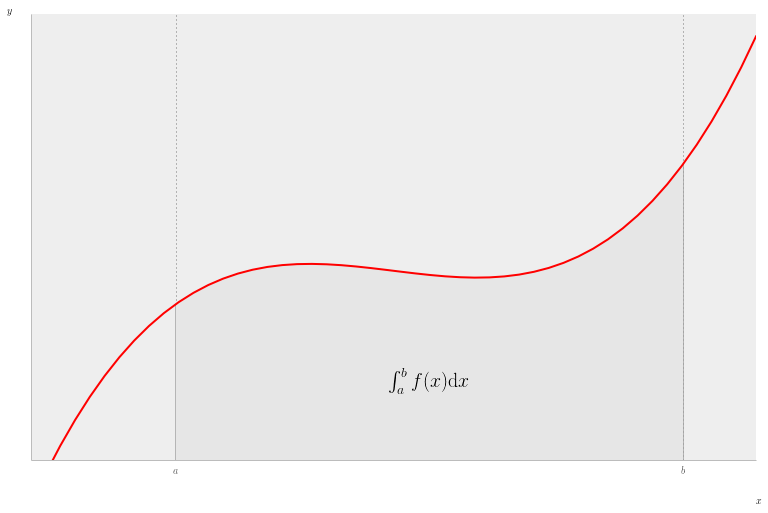

In [29]:
from matplotlib.patches import Polygon

def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

a, b = 2, 9 # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

## plt.scatter

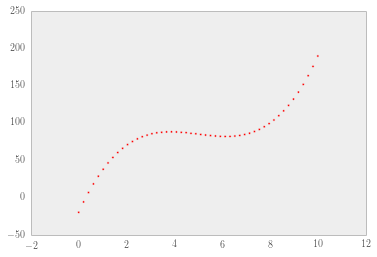

In [30]:
def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

x = np.linspace(0, 10)
y = func(x)

plt.grid()
plt.scatter(x, y, s=20, c='r', marker='.', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None)

## Pylab

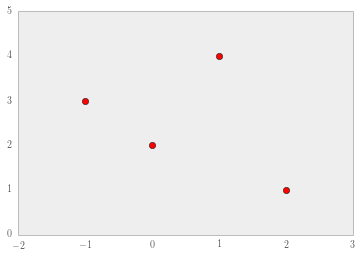

In [31]:
x = [-1, 0, 1, 2]
y = [3, 2, 4, 1]

plt.plot(x, y, 'ro')
plt.axis([-2,3,0,5])
plt.grid()          


In [32]:
%who
print n

FileLink	 Polygon	 a	 ax	 b	 fig	 func	 ix	 iy	 
matplotlib	 n	 np	 plt	 poly	 verts	 x	 y	 
10



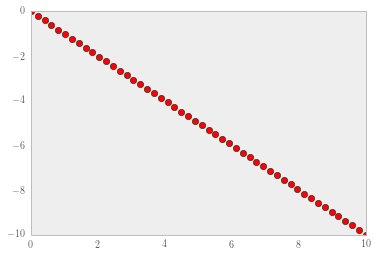

In [33]:
x = np.linspace(0, 10)
plt.plot(x, -x, 'ro')
plt.grid()

In [34]:
%who

FileLink	 Polygon	 a	 ax	 b	 fig	 func	 ix	 iy	 
matplotlib	 n	 np	 plt	 poly	 verts	 x	 y	 


# Installation de brian


utilisation de la cellule:

````
%%bash
#aptitude search brian
#aptitude search matplotlib
#aptitude search pynn
#aptitude search NeuroTools
#aptitude search ipython
````


## Premier essai de brian

http://briansimulator.org/

à chercher sur:

https://duckduckgo.com/?q=neural+brian+ipython+notebook

### Random network

Un réseau de neuronesde type Brunel (CUBA):

* 4000 neurones COBA: conductance-based : rest à -49*mV ; tau à 20*ms, tau_e = 5ms; tau_i = 10ms
* connectivité 80 / 20

/usr/local/lib/python2.7/site-packages/brian/utils/sparse_patch/__init__.py:39: UserWarning: Couldn't find matching sparse matrix patch for scipy version 0.13.3, but in most cases this shouldn't be a problem.
  warnings.warn("Couldn't find matching sparse matrix patch for scipy version %s, but in most cases this shouldn't be a problem." % scipy.__version__)


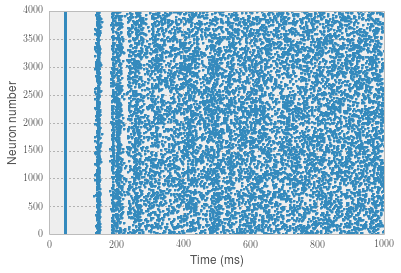

In [36]:
import brian as sim
sim.clock.reinit_default_clock()

eqs = '''
dv/dt = (ge+gi-(v+49*mV))/(20*ms) : volt
dge/dt = -ge/(5*ms) : volt
dgi/dt = -gi/(10*ms) : volt
'''
P = sim.NeuronGroup(4000, eqs, threshold=-50*sim.mV, reset=-80*sim.mV)
P.v = -60*sim.mV
Pe = P.subgroup(3200)
Pi = P.subgroup(800)
Ce = sim.Connection(Pe, P, 'ge', weight=.52*sim.mV, sparseness=0.01)
Ci = sim.Connection(Pi, P, 'gi', weight=-11*sim.mV, sparseness=0.02)
M = sim.SpikeMonitor(P)
sim.run(1*sim.second)
sim.raster_plot(M)
#sim.show()   

### Synfire chain

Diesmann et al 99

brian.equations   : WARNING  Equation variable y also exists in the namespace
brian.equations   : WARNING  Equation variable x also exists in the namespace
brian.equations   : WARNING  Equation variable y also exists in the namespace
brian.equations   : WARNING  Equation variable x also exists in the namespace


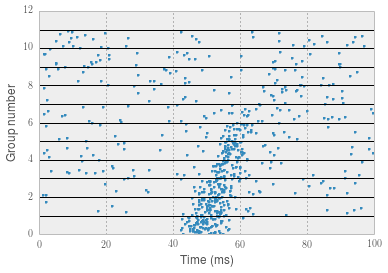

In [37]:
import brian as sim
sim.clock.reinit_default_clock()
# Neuron model parameters
Vr = -70*sim.mV
Vt = -55*sim.mV
taum = 10*sim.ms
taupsp = 0.325*sim.ms
weight = 4.86 *sim.mV
# Neuron model
eqs=sim.Equations('''
dV/dt=(-(V-Vr)+x)*(1./taum) : volt
dx/dt=(-x+y)*(1./taupsp) : volt
dy/dt=-y*(1./taupsp)+25.27*mV/ms + (39.24*mV/ms**0.5)*xi : volt
''')
# Neuron groups
P = sim.NeuronGroup(N=1000, model=eqs,threshold=Vt, reset=Vr, refractory=1*sim.ms)
Pinput = sim.PulsePacket(t=50*sim.ms, n=85, sigma=4*sim.ms)
# The network structure
Pgp = [P.subgroup(100) for i in range(10)]
C = sim.Connection(P,P,'y')
for i in range(9):
    C.connect_full(Pgp[i],Pgp[i+1],weight)
Cinput = sim.Connection(Pinput,Pgp[0],'y')
Cinput.connect_full(weight=weight)
# Record the spikes
Mgp = [sim.SpikeMonitor(p) for p in Pgp]
Minput = sim.SpikeMonitor(Pinput)
monitors = [Minput]+Mgp
# Setup the network, and run it
P.V = Vr + sim.rand(len(P)) * (Vt-Vr)
sim.run(100*sim.ms)
# Plot result
sim.raster_plot(showgrouplines=True,*monitors)

### Network of sparsely connected inhibitory integrate-and-fire neurons

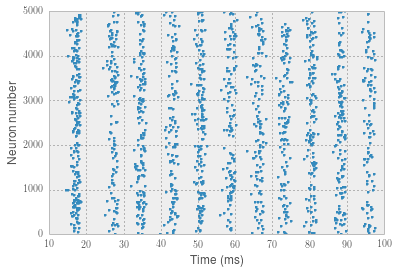

In [38]:
import brian as sim
sim.clock.reinit_default_clock()
# Network parameters
N = 5000
Vr = 10 * sim.mV
theta = 20 * sim.mV
tau = 20 * sim.ms
delta = 2 * sim.ms
taurefr = 4 * sim.ms
duration = .1 * sim.second
C = 1000
sparseness = float(C)/N
J = .1 * sim.mV
muext = 25 * sim.mV
sigmaext = 1 * sim.mV
# Neuron model
eqs = "dV/dt=(-V+muext+sigmaext*sim.sqrt(tau)*xi)/tau : volt"
group = sim.NeuronGroup(N, eqs, threshold=theta,reset=Vr, refractory=taurefr)
group.V = Vr
# Connections
conn = sim.Connection(group, group, state='V', delay=delta, weight=-J, sparseness=sparseness)
# Monitors
M = sim.SpikeMonitor(group)
# Run
sim.run(duration)
# Plot
sim.raster_plot(M)

### Topographically connected network

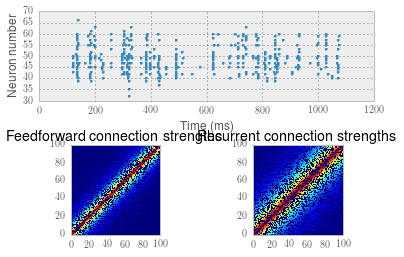

In [39]:
import brian as sim
N=100
tau=10*sim.ms
tau_e=2*sim.ms # AMPA synapse
eqs='''
dv/dt=(I-v)/tau : volt
dI/dt=-I/tau_e : volt
'''
rates=sim.zeros(N)*sim.Hz
rates[N/2-10:N/2+10]=sim.ones(20)*30*sim.Hz
layer1=sim.PoissonGroup(N,rates=rates)
layer2=sim.NeuronGroup(N,model=eqs,threshold=10*sim.mV,reset=0*sim.mV)
topomap=lambda i,j:sim.exp(-abs(i-j)*.1)*3*sim.mV
feedforward=sim.Connection(layer1,layer2,sparseness=.5,weight=topomap)
lateralmap=lambda i,j:sim.exp(-abs(i-j)*.05)*0.5*sim.mV
recurrent=sim.Connection(layer2,layer2,sparseness=.5,weight=lateralmap)
spikes=sim.SpikeMonitor(layer2)
sim.run(1*sim.second)
sim.subplot(211)
sim.raster_plot(spikes)
sim.subplot(223)
sim.imshow(feedforward.W.todense(), interpolation='nearest', origin='lower')
sim.title('Feedforward connection strengths')
sim.subplot(224)
sim.imshow(recurrent.W.todense(), interpolation='nearest', origin='lower')
sim.title('Recurrent connection strengths')
sim.show()

### Adaptive threshold model

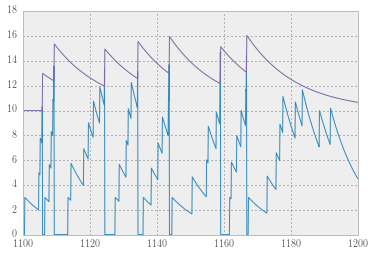

In [40]:
import brian as sim
reset='''
v=0*sim.mV
vt+=3*sim.mV
'''
eqs='''
dv/dt = -v/(10*sim.ms) : volt
dvt/dt = (10*sim.mV-vt)/(15*sim.ms) : volt
'''
IF = sim.NeuronGroup(1, model=eqs,reset=reset,threshold='v>vt')
IF.rest()
PG = sim.PoissonGroup(1, 500*sim.Hz)
C = sim.Connection(PG, IF, 'v',weight=3*sim.mV)
Mv = sim.StateMonitor(IF, 'v', record=True)
Mvt = sim.StateMonitor(IF, 'vt', record=True)
sim.run(100*sim.ms)
sim.plot(Mv.times/sim.ms, Mv[0]/sim.mV)
sim.plot(Mvt.times/sim.ms, Mvt[0]/sim.mV)
sim.show()

### Hodgkin-Huxley network

brian.equations   : WARNING  Equation variable n also exists in the namespace
brian.equations   : WARNING  Equation variable n also exists in the namespace


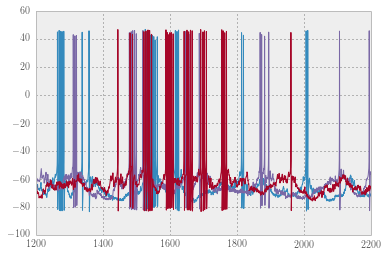

In [41]:
from brian import *
# Parameters
area=20000*umetre**2
Cm=(1*ufarad*cm**-2)*area
gl=(5e-5*siemens*cm**-2)*area
El=-60*mV
EK=-90*mV
ENa=50*mV
g_na=(100*msiemens*cm**-2)*area
g_kd=(30*msiemens*cm**-2)*area
VT=-63*mV
# Time constants
taue=5*ms
taui=10*ms
# Reversal potentials
Ee=0*mV
Ei=-80*mV
we=6*nS # excitatory synaptic weight (voltage)
wi=67*nS # inhibitory synaptic weight
# The model
eqs=Equations('''
dv/dt = (gl*(El-v)+ge*(Ee-v)+gi*(Ei-v)-g_na*(m*m*m)*h*(v-ENa)-g_kd*(n*n*n*n)*(v-EK))/Cm : volt
dm/dt = alpham*(1-m)-betam*m : 1
dn/dt = alphan*(1-n)-betan*n : 1
dh/dt = alphah*(1-h)-betah*h : 1
dge/dt = -ge*(1./taue) : siemens
dgi/dt = -gi*(1./taui) : siemens
alpham = 0.32*(mV**-1)*(13*mV-v+VT)/(exp((13*mV-v+VT)/(4*mV))-1.)/ms : Hz
betam = 0.28*(mV**-1)*(v-VT-40*mV)/(exp((v-VT-40*mV)/(5*mV))-1)/ms : Hz
alphah = 0.128*exp((17*mV-v+VT)/(18*mV))/ms : Hz
betah = 4./(1+exp((40*mV-v+VT)/(5*mV)))/ms : Hz
alphan = 0.032*(mV**-1)*(15*mV-v+VT)/(exp((15*mV-v+VT)/(5*mV))-1.)/ms : Hz
betan = .5*exp((10*mV-v+VT)/(40*mV))/ms : Hz
''')
P=NeuronGroup(4000,model=eqs,
threshold=EmpiricalThreshold(threshold=-20*mV,refractory=3*ms),
implicit=True,freeze=True)
Pe=P.subgroup(3200)
Pi=P.subgroup(800)
Ce=Connection(Pe,P,'ge',weight=we,sparseness=0.02)
Ci=Connection(Pi,P,'gi',weight=wi,sparseness=0.02)
# Initialization
P.v=El+(randn(len(P))*5-5)*mV
P.ge=(randn(len(P))*1.5+4)*10.*nS
P.gi=(randn(len(P))*12+20)*10.*nS
# Record a few trace
trace=StateMonitor(P,'v',record=[1,10,100])
run(1000*msecond)
plot(trace.times/ms,trace[1]/mV)
plot(trace.times/ms,trace[10]/mV)
plot(trace.times/ms,trace[100]/mV)
show()

# Espace Toroïque

# 

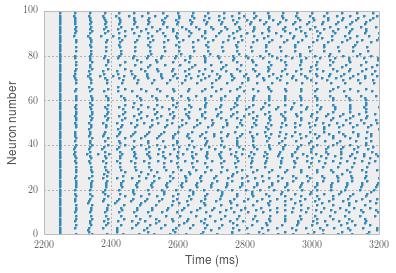

In [42]:
%matplotlib inline
import brian as sim
eqs = '''
dv/dt = (ge+gi-(v+49*mV))/(20*ms) : volt
dge/dt = -ge/(5*ms) : volt
dgi/dt = -gi/(10*ms) : volt
'''
P = sim.NeuronGroup(100, eqs, threshold=-50*sim.mV, reset=-60*sim.mV)
P.v = -60*sim.mV
Pe = P.subgroup(90)
Pi = P.subgroup(10)
Ce = sim.Connection(Pe, P, 'ge', weight=1.62*sim.mV, sparseness=0.02)
Ci = sim.Connection(Pi, P, 'gi', weight=-9*sim.mV, sparseness=0.02)
M = sim.SpikeMonitor(P)
sim.run(1*sim.second)
sim.raster_plot(M)
sim.show()

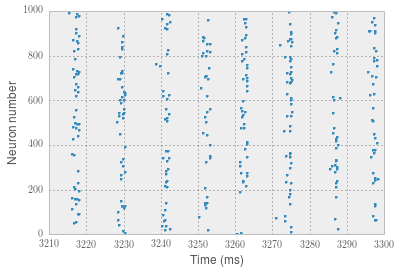

In [43]:
from brian import *
# Network parameters
N = 1000
Vr = 10 * mV
theta = 20 * mV
tau = 20 * ms
delta = 2 * ms
taurefr = 2 * ms
duration = .1 * second
C = 1000
sparseness = float(C)/N
J = .1 * mV
muext = 25 * mV
sigmaext = 1 * mV
# Neuron model
eqs = "dV/dt=(-V+muext+sigmaext*sqrt(tau)*xi)/tau : volt"
group = NeuronGroup(N, eqs, threshold=theta,
reset=Vr, refractory=taurefr)
group.V = Vr
# Connections
conn = Connection(group, group, state='V', delay=delta,
weight=-J, sparseness=sparseness)
# Monitors
M = SpikeMonitor(group)
# Run
run(duration)
# Plot
raster_plot(M)
show()

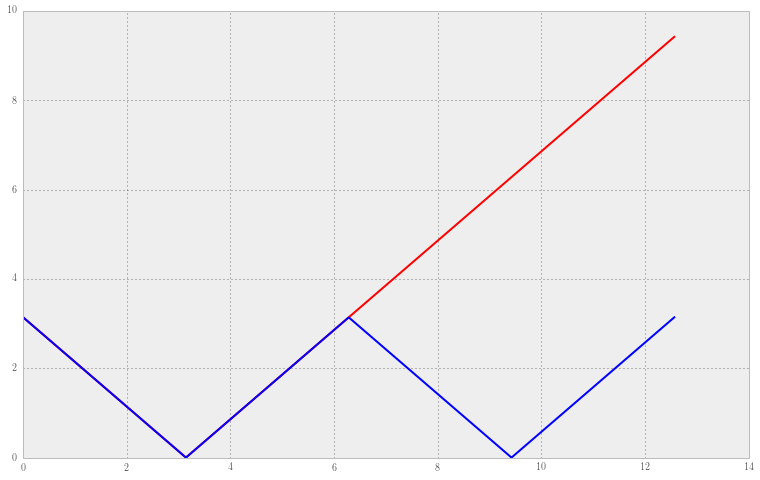

In [44]:
N_period = 2
theta1, theta = np.pi, np.linspace(0, 2*np.pi*N_period, 360*N_period)

fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(theta, np.abs(theta-theta1), 'r', linewidth=2)
plt.plot(theta, np.abs(np.mod(theta-theta1+np.pi, 2*np.pi)-np.pi), 'b', linewidth=2)
